<a href="https://colab.research.google.com/github/vaidande/Autoregressive-Model/blob/main/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

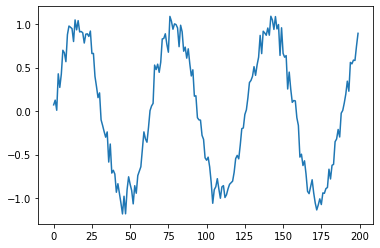

In [11]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 # (np.random.randn(200)*0.1) adding noise
plt.plot(series)
plt.show()

In [12]:
len(series)

200

In [13]:
T = 10
X = []
Y = []
for t in range(len(series) - T): # i.e. 200-10=190
  x = series[t:t+T] # eg. [0 to 0+10], [1 to 1+10], [2 to 2+10]
  X.append(x)
  y = series[t+T] # eg. [0+10], [1+10], [2+10]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [14]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr=0.1))

# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:])) # here train first half of the data is for training and second half for validating i.e from 0 to 95 train and 96 to 190 validate

Epoch 1/80
3/3 [==============================] - 0s 20ms/step - loss: 1.1453 - val_loss: 0.1411
Epoch 2/80
3/3 [==============================] - 0s 5ms/step - loss: 0.4712 - val_loss: 0.5754
Epoch 3/80
3/3 [==============================] - 0s 5ms/step - loss: 0.3921 - val_loss: 0.1328
Epoch 4/80
3/3 [==============================] - 0s 5ms/step - loss: 0.1124 - val_loss: 0.1653
Epoch 5/80
3/3 [==============================] - 0s 5ms/step - loss: 0.2688 - val_loss: 0.1210
Epoch 6/80
3/3 [==============================] - 0s 5ms/step - loss: 0.1068 - val_loss: 0.0187
Epoch 7/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0532 - val_loss: 0.0835
Epoch 8/80
3/3 [==============================] - 0s 6ms/step - loss: 0.1166 - val_loss: 0.0409
Epoch 9/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0506 - val_loss: 0.0437
Epoch 10/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0580 - val_loss: 0.0665
Epoch 11/80
3/3 [=====================

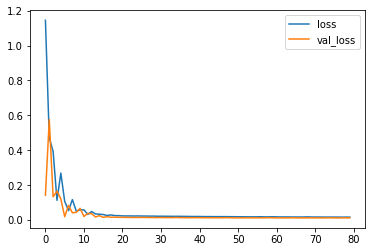

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [16]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D arra8y of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

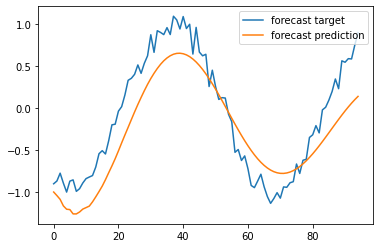

In [17]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()